# Part 1 - Basic Exploration of US Data

***

## Project Description

While understanding the trends on a national level can be helpful in understanding how COVID-19 impacted the United States, it is important to remember that the virus arrived in the United States at different times. For the next part of your analysis, you will begin to look at COVID related deaths and cases at the state and county-levels. 

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

#Plotly
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import researchpy as rp

import datetime
from datetime import datetime, timedelta

# import eli5
# from IPython.display import display

#import os
#import zipfile
import scipy.stats
from collections import Counter


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


### Question 1. 

Determine the top 10 states in terms of total deaths and cases between March 15, 2020, and December 31, 2021. 

In [2]:
df1 = pd.read_csv("us-counties-2020.csv",parse_dates=['date'])

In [3]:
df1

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.00,1,0.00
1,2020-01-22,Snohomish,Washington,53061.00,1,0.00
2,2020-01-23,Snohomish,Washington,53061.00,1,0.00
3,2020-01-24,Cook,Illinois,17031.00,1,0.00
4,2020-01-24,Snohomish,Washington,53061.00,1,0.00
...,...,...,...,...,...,...
884732,2020-12-31,Sweetwater,Wyoming,56037.00,2966,16.00
884733,2020-12-31,Teton,Wyoming,56039.00,2138,4.00
884734,2020-12-31,Uinta,Wyoming,56041.00,1558,7.00
884735,2020-12-31,Washakie,Wyoming,56043.00,780,19.00


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884737 entries, 0 to 884736
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    884737 non-null  datetime64[ns]
 1   county  884737 non-null  object        
 2   state   884737 non-null  object        
 3   fips    876471 non-null  float64       
 4   cases   884737 non-null  int64         
 5   deaths  865976 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 40.5+ MB


In [5]:
df1.describe()

,fips,cases,deaths
count,876471.00,884737.00,865976.00
mean,31262.22,1952.32,53.60
std,16295.23,10106.48,451.86
min,1001.00,0.00,0.00
25%,18183.00,36.00,0.00
50%,29215.00,228.00,4.00
75%,46099.00,993.00,21.00
max,78030.00,770915.00,25144.00


In [6]:
df1.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [7]:
df2020 = df1[df1["date"] >= "2020-03-15"]

In [8]:
df2020

,date,county,state,fips,cases,deaths
2309,2020-03-15,Baldwin,Alabama,1003.00,1,0.00
2310,2020-03-15,Elmore,Alabama,1051.00,1,0.00
2311,2020-03-15,Jefferson,Alabama,1073.00,13,0.00
2312,2020-03-15,Lee,Alabama,1081.00,1,0.00
2313,2020-03-15,Limestone,Alabama,1083.00,1,0.00
...,...,...,...,...,...,...
884732,2020-12-31,Sweetwater,Wyoming,56037.00,2966,16.00
884733,2020-12-31,Teton,Wyoming,56039.00,2138,4.00
884734,2020-12-31,Uinta,Wyoming,56041.00,1558,7.00
884735,2020-12-31,Washakie,Wyoming,56043.00,780,19.00


In [9]:
df2020.reset_index(inplace=True, drop=True)

In [10]:
df2020

,date,county,state,fips,cases,deaths
0,2020-03-15,Baldwin,Alabama,1003.00,1,0.00
1,2020-03-15,Elmore,Alabama,1051.00,1,0.00
2,2020-03-15,Jefferson,Alabama,1073.00,13,0.00
3,2020-03-15,Lee,Alabama,1081.00,1,0.00
4,2020-03-15,Limestone,Alabama,1083.00,1,0.00
...,...,...,...,...,...,...
882423,2020-12-31,Sweetwater,Wyoming,56037.00,2966,16.00
882424,2020-12-31,Teton,Wyoming,56039.00,2138,4.00
882425,2020-12-31,Uinta,Wyoming,56041.00,1558,7.00
882426,2020-12-31,Washakie,Wyoming,56043.00,780,19.00


In [11]:
state_total_cases = df2020.groupby("state")["cases"].sum()
state_total_cases

state
Alabama                      32235982
Alaska                        2854124
Arizona                      47146971
Arkansas                     18406345
California                  174966840
Colorado                     23441715
Connecticut                  17214186
Delaware                      5154364
District of Columbia          3644565
Florida                     138122838
Georgia                      62229960
Guam                           869347
Hawaii                        2129435
Idaho                        10608652
Illinois                     82118017
Indiana                      35947293
Iowa                         23267631
Kansas                       15948003
Kentucky                     18801501
Louisiana                    35116592
Maine                         1551404
Maryland                     29150884
Massachusetts                37418616
Michigan                     42112778
Minnesota                    29868329
Mississippi                  20500985
Missou

In [12]:
state_total_cases.sort_values().nlargest(10)

state
California        174966840
Texas             160158661
Florida           138122838
New York          126305713
Illinois           82118017
Georgia            62229960
New Jersey         57403086
Pennsylvania       47304799
Arizona            47146971
North Carolina     46306294
Name: cases, dtype: int64

In [13]:
state_total_deaths = df2020.groupby("state")["deaths"].sum()
state_total_deaths

state
Alabama                     526388.00
Alaska                       13147.00
Arizona                    1048821.00
Arkansas                    285868.00
California                 3065085.00
Colorado                    542865.00
Connecticut                1119863.00
Delaware                    145664.00
District of Columbia        146395.00
Florida                    2632219.00
Georgia                    1363974.00
Guam                         10424.00
Hawaii                       27227.00
Idaho                       109143.00
Illinois                   2211390.00
Indiana                     920773.00
Iowa                        335716.00
Kansas                      187626.00
Kentucky                    285739.00
Louisiana                  1184573.00
Maine                        35654.00
Maryland                    912049.00
Massachusetts              2222455.00
Michigan                   1837617.00
Minnesota                   531337.00
Mississippi                 572569.00
Missou

In [14]:
state_total_deaths.sort_values().nlargest(10)

state
New York        8320596.00
New Jersey      3817144.00
California      3065085.00
Texas           2927740.00
Florida         2632219.00
Massachusetts   2222455.00
Illinois        2211390.00
Pennsylvania    2002629.00
Michigan        1837617.00
Georgia         1363974.00
Name: deaths, dtype: float64

### Question 2. 
Determine the top 10 states in terms of deaths and cases per 100,000 people between March 15, 2020, and December 31, 2021. 

### Question 3. 
Calculate seven-day averages for new cases and deaths per 100,000 people in a state of your choice. 

### Question 4. 
Identify the top 5 counties in terms of deaths and cases per 100,000 people in the state used in Question 2. 

### Question 5
Modify the exisiting code to produce a county-level map projection of deaths and cases per 100,000 people of the state used in Question 2.

In [15]:
alabama = df2020[df2020["state"] == "Alabama"]

In [16]:
alabama

,date,county,state,fips,cases,deaths
0,2020-03-15,Baldwin,Alabama,1003.00,1,0.00
1,2020-03-15,Elmore,Alabama,1051.00,1,0.00
2,2020-03-15,Jefferson,Alabama,1073.00,13,0.00
3,2020-03-15,Lee,Alabama,1081.00,1,0.00
4,2020-03-15,Limestone,Alabama,1083.00,1,0.00
...,...,...,...,...,...,...
879245,2020-12-31,Tuscaloosa,Alabama,1125.00,18468,218.00
879246,2020-12-31,Walker,Alabama,1127.00,5259,138.00
879247,2020-12-31,Washington,Alabama,1129.00,1184,24.00
879248,2020-12-31,Wilcox,Alabama,1131.00,883,19.00


In [17]:
alabama.reset_index(inplace=True, drop=True)

In [18]:
alabama

,date,county,state,fips,cases,deaths
0,2020-03-15,Baldwin,Alabama,1003.00,1,0.00
1,2020-03-15,Elmore,Alabama,1051.00,1,0.00
2,2020-03-15,Jefferson,Alabama,1073.00,13,0.00
3,2020-03-15,Lee,Alabama,1081.00,1,0.00
4,2020-03-15,Limestone,Alabama,1083.00,1,0.00
...,...,...,...,...,...,...
18930,2020-12-31,Tuscaloosa,Alabama,1125.00,18468,218.00
18931,2020-12-31,Walker,Alabama,1127.00,5259,138.00
18932,2020-12-31,Washington,Alabama,1129.00,1184,24.00
18933,2020-12-31,Wilcox,Alabama,1131.00,883,19.00


In [19]:
alabama.county.unique()

array(['Baldwin', 'Elmore', 'Jefferson', 'Lee', 'Limestone', 'Montgomery',
       'Shelby', 'Tuscaloosa', 'Madison', 'St. Clair', 'Calhoun',
       'Talladega', 'Chambers', 'Mobile', 'Walker', 'Cullman', 'Jackson',
       'Lamar', 'Lauderdale', 'Washington', 'Marion', 'Franklin',
       'Houston', 'Tallapoosa', 'Autauga', 'Morgan', 'Blount', 'Butler',
       'Cherokee', 'Chilton', 'Clay', 'Cleburne', 'Colbert', 'Dallas',
       'Etowah', 'Lawrence', 'Marshall', 'Pickens', 'Pike', 'Russell',
       'Wilcox', 'Bullock', 'Choctaw', 'Coosa', 'Crenshaw', 'DeKalb',
       'Lowndes', 'Marengo', 'Covington', 'Escambia', 'Greene',
       'Randolph', 'Winston', 'Monroe', 'Macon', 'Bibb', 'Fayette',
       'Hale', 'Sumter', 'Clarke', 'Conecuh', 'Dale', 'Coffee', 'Barbour',
       'Henry', 'Perry', 'Geneva'], dtype=object)

In [20]:
county = alabama.groupby("county").mean()
county

,fips,cases,deaths
county,,,
Autauga,1001.00,1309.76,20.08
Baldwin,1003.00,3861.32,42.62
Barbour,1005.00,640.44,7.45
Bibb,1007.00,535.09,9.70
Blount,1009.00,1239.25,13.67
...,...,...,...
Tuscaloosa,1125.00,5701.72,79.50
Walker,1127.00,1738.61,54.42
Washington,1129.00,415.54,10.14


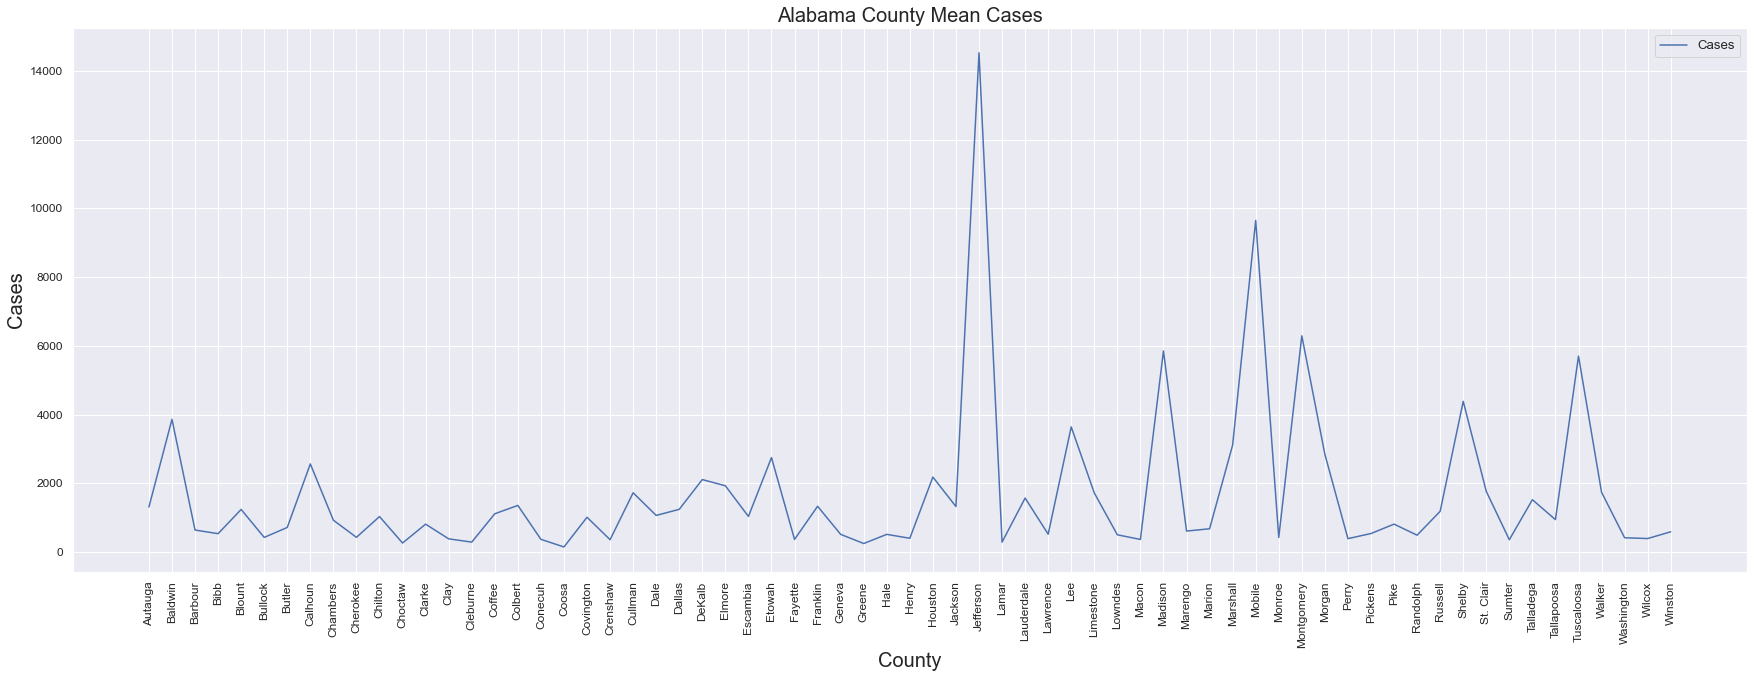

In [21]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=county.index,y=county.cases,data=county, estimator=None)
plt.title("Alabama County Mean Cases", fontsize=20)
plt.xlabel("County", fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel("Cases", fontsize=20)
plt.legend(['Cases'])
plt.show()

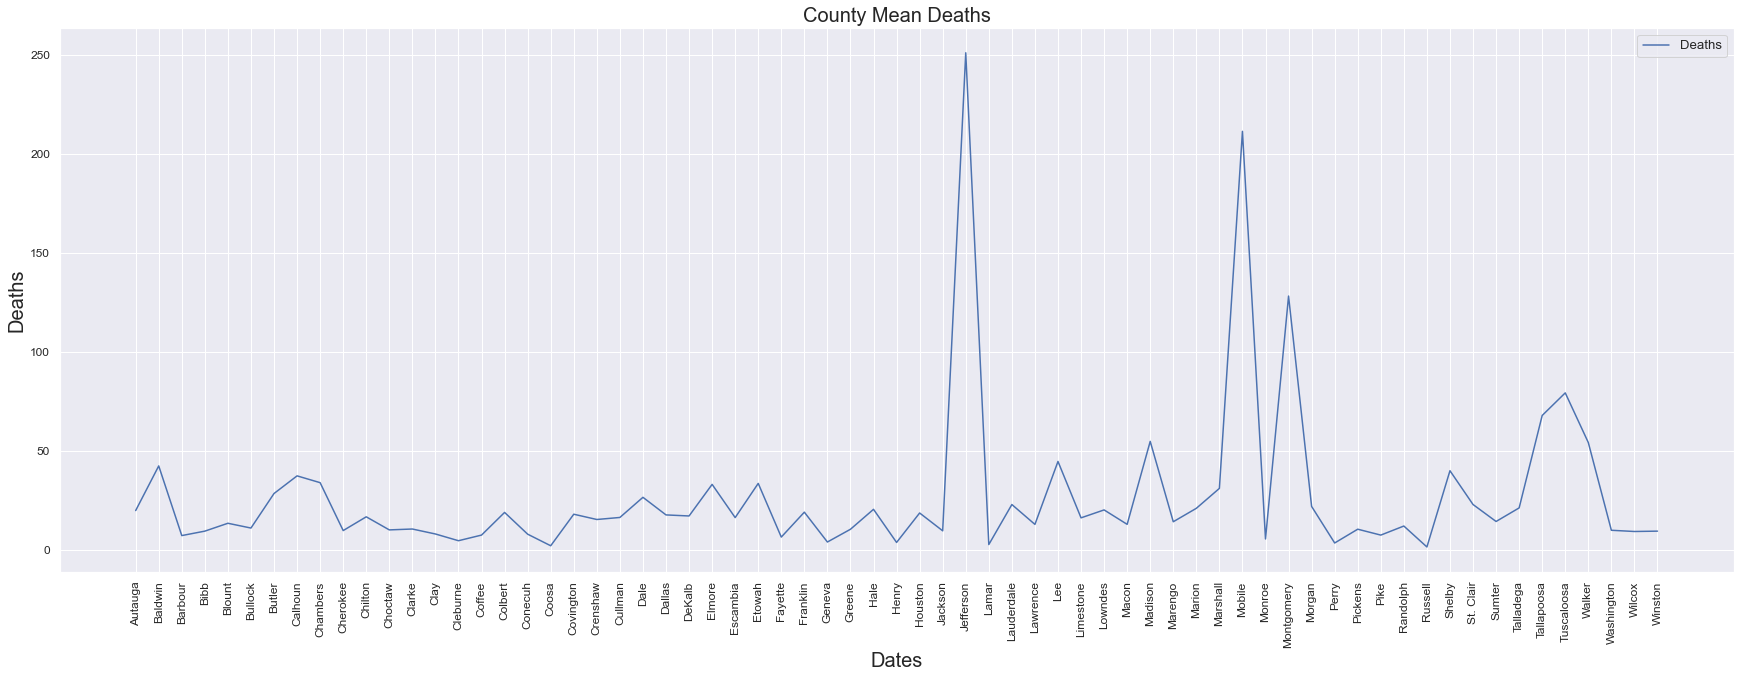

In [23]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=county.index,y=county.deaths ,data=county, estimator=None)
plt.title("County Mean Deaths", fontsize=20)
plt.xlabel("Dates", fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel("Deaths", fontsize=20)
plt.legend(['Deaths'])
plt.show()

### Question 6. 
Select three additional states, calculate seven-day averages for new deaths and cases per 100,000 people between March 15, 2020, and December 31, 2021.

### Question 7. 
Create a visualization to comparing the statistics from Question 6. 

#### Python code done by Dennis Lam